In [41]:
import glob
import io
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from PIL import Image
from tqdm import tqdm

In [2]:
# You need to change that to your project directory

PROJECT_DIR = '/Users/simon.cazals/Desktop/projects/steel'

In [3]:
TFRECORD_DIR = '/Users/simon.cazals/Desktop/projects/steel/data/tfrecord/'

In [29]:
tfrecords_filenames = glob.glob(os.path.join(TFRECORD_DIR, 'train-*.tfrecord'))
print(len(tfrecords_filenames))

5



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/42d2a363d.jpg'


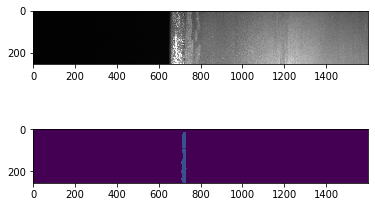


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/4ebff3a81.jpg'


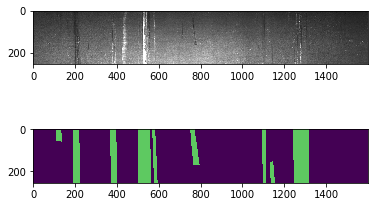



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/17b384c3e.jpg'


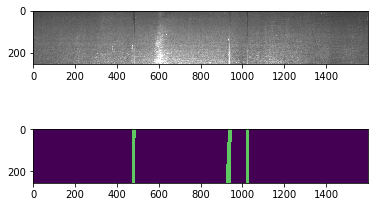




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/8f567296c.jpg'


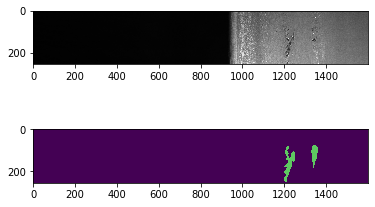



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/621c5bfe5.jpg'


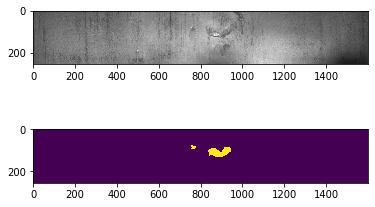



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/439f1a016.jpg'


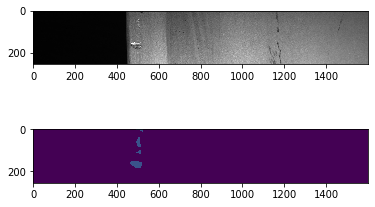


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/7b3666172.jpg'


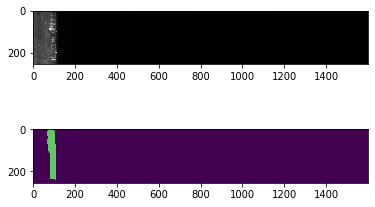





Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/ac550233a.jpg'


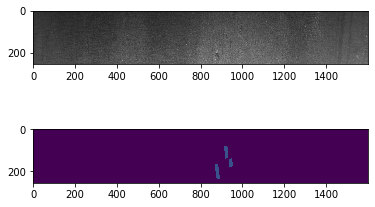


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/495d5828b.jpg'


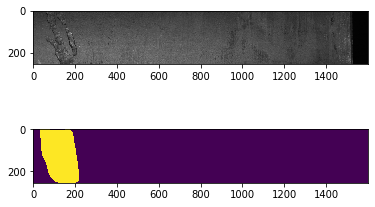




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/fdb705792.jpg'


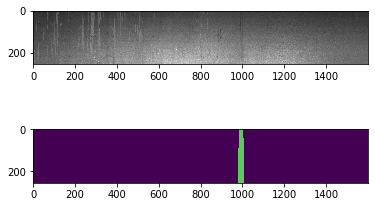


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/059000a4f.jpg'


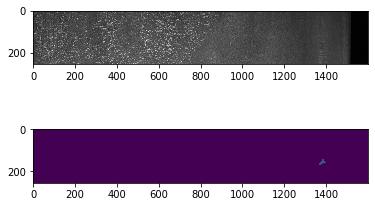




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/74131d9ff.jpg'


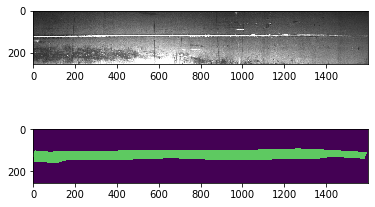



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/fdabe52ee.jpg'


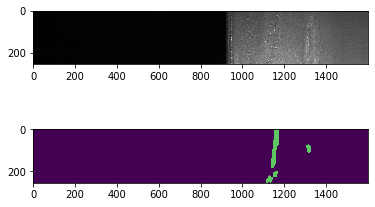


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/4accda000.jpg'


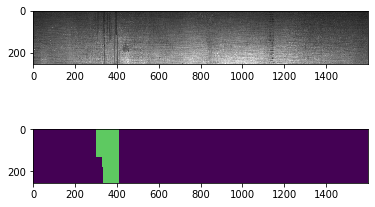



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/e5f1d5a38.jpg'


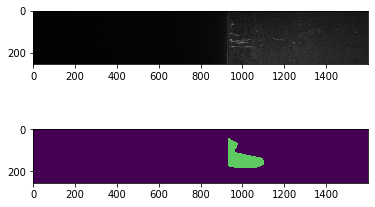



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/28661fd17.jpg'


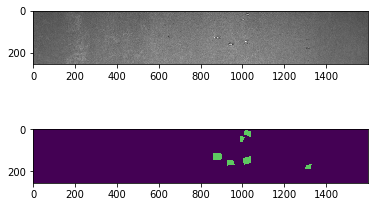




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/d572dc596.jpg'


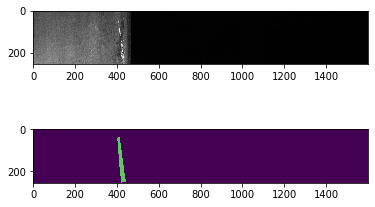


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/7c00478a3.jpg'


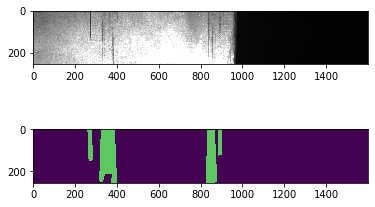


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/6b39ef48e.jpg'


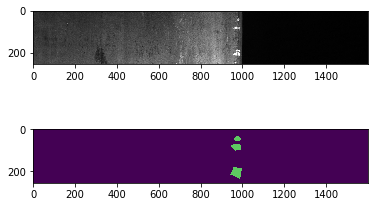


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/051f0d825.jpg'


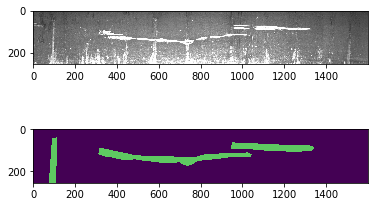




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/cf1152c44.jpg'


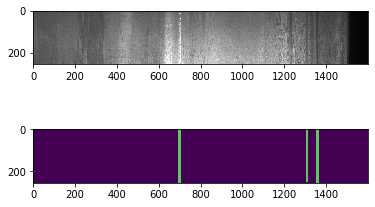


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/3a53d95f3.jpg'


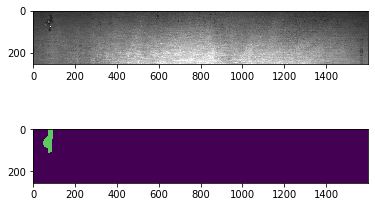



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/6ee81c40c.jpg'


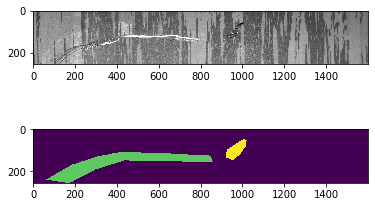


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/7b3566fb9.jpg'


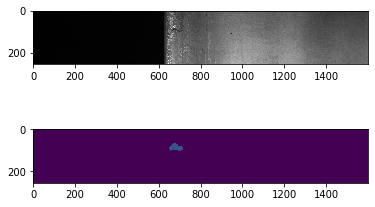


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/746417f50.jpg'


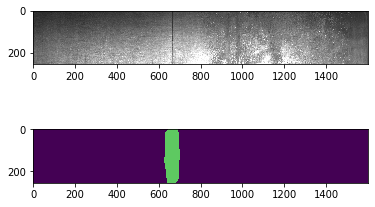



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/77c7c7966.jpg'


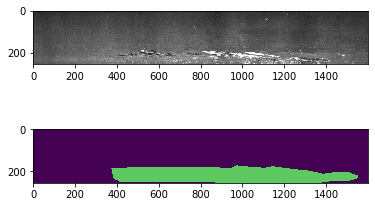


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/cbcd45716.jpg'


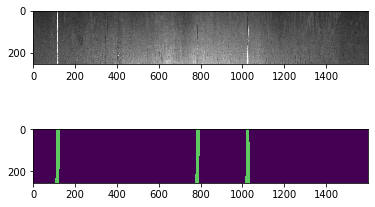




Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/fff02e9c5.jpg'


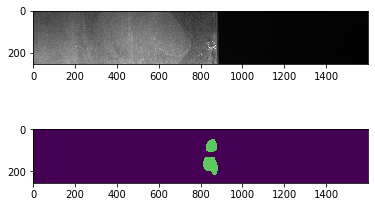


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/78045cb2f.jpg'


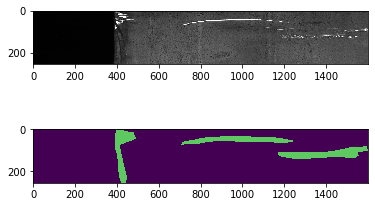


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/9d3b4a019.jpg'


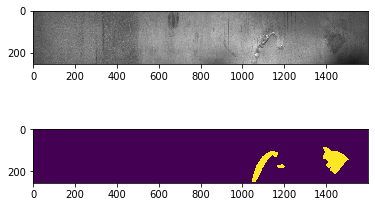


Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/e03bf53d8.jpg'


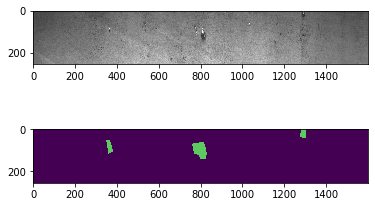



Filename : b'/Users/simon.cazals/Desktop/projects/steel/data/train_images/52df7277c.jpg'


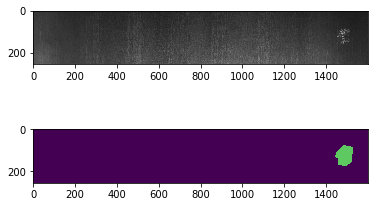

In [ ]:
tfrecords_filename = tfrecords_filenames[0]
# print(tfrecords_filename)
# print()

record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)

count = 0

for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    features = example.features.feature
    
    filename = features['image/filename'].bytes_list.value[0]

    height = features['image/height'].int64_list.value[0]
    width = features['image/width'].int64_list.value[0]
    channels = features['image/channels'].int64_list.value[0]
#   print("Image dimensions : {} x {} x {}".format(height, width, channels))

#     print("Image format : {}".format(features['image/format'].bytes_list.value[0]))
#     print("Mask format : {}".format(features['image/segmentation/class/format'].bytes_list.value[0]))
    image_encoded = example.features.feature['image/encoded'].bytes_list.value[0]
    image = np.array(Image.open(io.BytesIO(image_encoded)))
    
    mask_encoded = example.features.feature['image/segmentation/class/encoded'].bytes_list.value[0]
    mask = np.array(Image.open(io.BytesIO(mask_encoded)))
    
    if len(set(mask.flatten())) > 1:
        print("Filename : {}".format(filename))

        plt.subplot(2, 1, 1)
        plt.imshow(image)

        plt.subplot(2, 1, 2)
        plt.imshow(mask, vmin=0, vmax=4)
        plt.show()
    
    count += 1
    if count == 200:
        break
    print()
    

In [33]:
stream = io.BytesIO(image_encoded)
img = Image.open(stream)

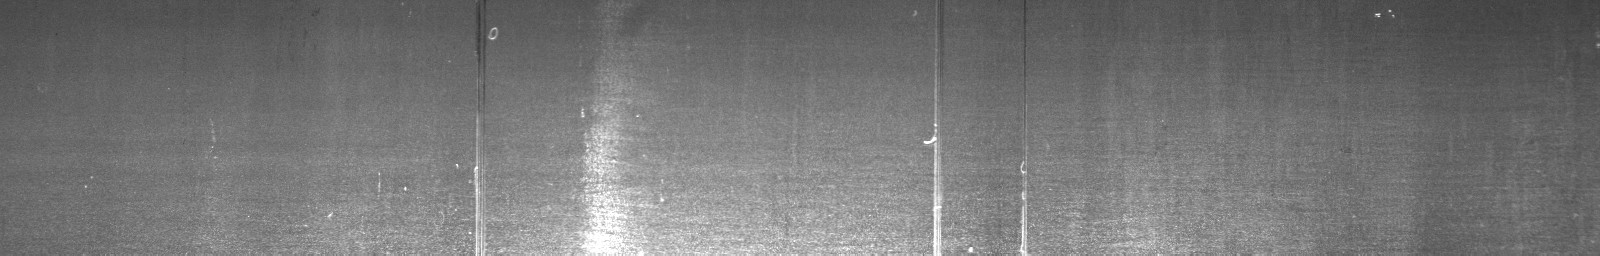

In [34]:
img

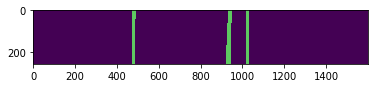

In [40]:
stream = io.BytesIO(mask_encoded)
mask = np.array(Image.open(stream))
plt.imshow(mask, vmin=0, vmax=4)